# Time Series Forecasting Using LSTM

1. Univariate LSTM Models
    1. Data Preparation
    2. Vanilla LSTM
    3. Stacked LSTM
    4. Bidirectional LSTM
    5. CNN LSTM
    6. ConvLSTM
   
   
2. Multivariate LSTM Models
    1. Multiple Input Series.
    2. Multiple Parallel Series
    
    
3. Multi-Step LSTM Models
    1. Data Preparation
    2. Vector Output Model
    3. Encoder-Decoder Model
    
    
4. Multivariate Multi-Step LSTM Models
    1. Multiple Input Multi-Step Output.
    2. Multiple Parallel Input and Multi-Step Output.

## Univarite Forecasting on dummy dataset

### 1. Import all the dependencies

In [85]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd

import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

### 2. preparing independent and dependent features

In [2]:

def prepare_data(timeseries_data, n_features):
    """
    objective: prepare data for time serires forecasting 
    
    timeseries_data: input array 
    n_features: time_step
    
    return: X, y 
    """
    
    X, y =[],[]
    
    for i in range(len(timeseries_data)):
        
        # find the end of this pattern
        end_ix = i + n_features
        
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X) # x independent variable

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]


In [5]:
print(y) # y dependent variable

[146 158 172 187 196 210]


In [6]:
X.shape

(6, 3)

### 3.  Reshape the data

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
X.shape

(6, 3, 1)

In [9]:
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

### 4. Build and Compile the model

In [10]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

### 5. Train the model

In [11]:
EPOCHS = 300

# fit model
H = model.fit(X, y, epochs=EPOCHS, verbose=1)

Train on 6 samples
Epoch 1/300
6/6 [==============================] - 2s 289ms/sample - loss: 32344.5703
Epoch 2/300
6/6 [==============================] - 0s 833us/sample - loss: 31904.7520
Epoch 3/300
6/6 [==============================] - 0s 836us/sample - loss: 31395.3965
Epoch 4/300
6/6 [==============================] - 0s 999us/sample - loss: 30873.6621
Epoch 5/300
6/6 [==============================] - 0s 1ms/sample - loss: 30357.1562
Epoch 6/300
6/6 [==============================] - 0s 1ms/sample - loss: 29848.0723
Epoch 7/300
6/6 [==============================] - 0s 1ms/sample - loss: 29334.0098
Epoch 8/300
6/6 [==============================] - 0s 1ms/sample - loss: 28833.2031
Epoch 9/300
6/6 [==============================] - 0s 1ms/sample - loss: 28332.1426
Epoch 10/300
6/6 [==============================] - 0s 999us/sample - loss: 27809.5684
Epoch 11/300
6/6 [==============================] - 0s 1ms/sample - loss: 27236.7598
Epoch 12/300
6/6 [===========================

Epoch 98/300
6/6 [==============================] - 0s 1ms/sample - loss: 10.8624
Epoch 99/300
6/6 [==============================] - 0s 667us/sample - loss: 10.7663
Epoch 100/300
6/6 [==============================] - 0s 667us/sample - loss: 10.5450
Epoch 101/300
6/6 [==============================] - 0s 1ms/sample - loss: 10.2413
Epoch 102/300
6/6 [==============================] - 0s 834us/sample - loss: 9.9555
Epoch 103/300
6/6 [==============================] - 0s 834us/sample - loss: 9.7829
Epoch 104/300
6/6 [==============================] - 0s 666us/sample - loss: 9.6467
Epoch 105/300
6/6 [==============================] - 0s 667us/sample - loss: 9.5155
Epoch 106/300
6/6 [==============================] - 0s 833us/sample - loss: 9.4253
Epoch 107/300
6/6 [==============================] - 0s 667us/sample - loss: 9.2863
Epoch 108/300
6/6 [==============================] - 0s 834us/sample - loss: 9.1740
Epoch 109/300
6/6 [==============================] - 0s 833us/sample - loss: 9

Epoch 196/300
6/6 [==============================] - 0s 667us/sample - loss: 3.6230
Epoch 197/300
6/6 [==============================] - 0s 834us/sample - loss: 3.6473
Epoch 198/300
6/6 [==============================] - 0s 666us/sample - loss: 3.7096
Epoch 199/300
6/6 [==============================] - 0s 665us/sample - loss: 3.7698
Epoch 200/300
6/6 [==============================] - 0s 834us/sample - loss: 3.6639
Epoch 201/300
6/6 [==============================] - 0s 834us/sample - loss: 3.5842
Epoch 202/300
6/6 [==============================] - 0s 667us/sample - loss: 3.5659
Epoch 203/300
6/6 [==============================] - 0s 834us/sample - loss: 3.6046
Epoch 204/300
6/6 [==============================] - 0s 833us/sample - loss: 3.6635
Epoch 205/300
6/6 [==============================] - 0s 667us/sample - loss: 3.6348
Epoch 206/300
6/6 [==============================] - 0s 668us/sample - loss: 3.6010
Epoch 207/300
6/6 [==============================] - 0s 833us/sample - loss:

Epoch 294/300
6/6 [==============================] - 0s 833us/sample - loss: 4.3320
Epoch 295/300
6/6 [==============================] - 0s 667us/sample - loss: 3.2707
Epoch 296/300
6/6 [==============================] - 0s 667us/sample - loss: 2.9691
Epoch 297/300
6/6 [==============================] - 0s 833us/sample - loss: 3.5482
Epoch 298/300
6/6 [==============================] - 0s 667us/sample - loss: 3.2168
Epoch 299/300
6/6 [==============================] - 0s 834us/sample - loss: 2.9170
Epoch 300/300
6/6 [==============================] - 0s 500us/sample - loss: 3.1308


### 6. Plost Training Loss 

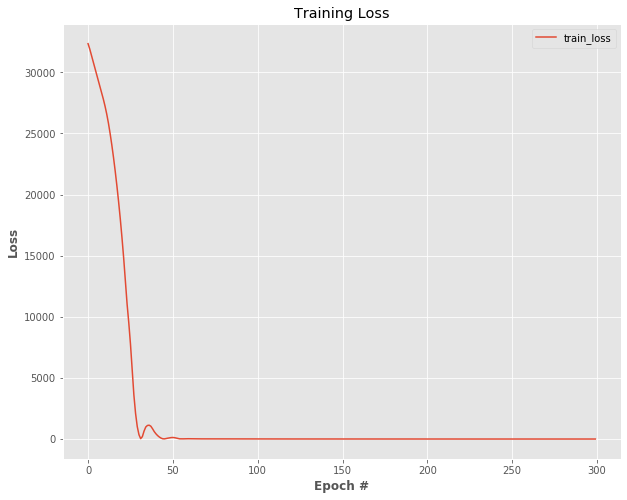

In [12]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

### 7. Predicting For the next 10 data

In [15]:
# demonstrate prediction for next 10 days

x_input = np.array([187, 196, 210], dtype="float32")
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        
        x_input=array(temp_input[1:])
        
        print("--"*25)
        print("{} - day input: {}".format(i,x_input))

        x_input = x_input.reshape((1, n_steps, n_features))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output: {}".format(i,yhat[0]))
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]

        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print()
print("FINAL OUTPUT FOR 10 DAYS..")
print(lst_output)

[224.7021]
--------------------------------------------------
1 - day input: [196.     210.     224.7021]
1 - day output: [235.78992]
--------------------------------------------------
2 - day input: [210.      224.7021  235.78992]
2 - day output: [249.86243]
--------------------------------------------------
3 - day input: [224.7021  235.78992 249.86243]
3 - day output: [263.56052]
--------------------------------------------------
4 - day input: [235.78992 249.86243 263.56052]
4 - day output: [276.33698]
--------------------------------------------------
5 - day input: [249.86243 263.56052 276.33698]
5 - day output: [290.68246]
--------------------------------------------------
6 - day input: [263.56052 276.33698 290.68246]
6 - day output: [304.80215]
--------------------------------------------------
7 - day input: [276.33698 290.68246 304.80215]
7 - day output: [319.07947]
--------------------------------------------------
8 - day input: [290.68246 304.80215 319.07947]
8 - day outp

### 8. Visualizaing The Output

In [16]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [17]:
lst_output

[224.7021,
 235.78992,
 249.86243,
 263.56052,
 276.33698,
 290.68246,
 304.80215,
 319.07947,
 334.23706,
 349.54022]

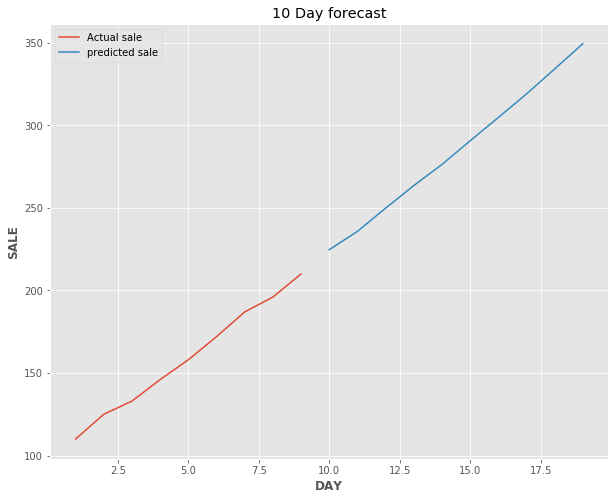

In [20]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,timeseries_data, label="Actual sale")
plt.plot(day_pred,lst_output, label="predicted sale")
plt.title("10 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("SALE", weight="bold")
plt.legend()
plt.show()

## Stock Prediction and Forecasting Using Stacked LSTM

In [28]:
df = pd.read_csv('Apple Stocks Prise.csv')

In [29]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [37]:
df.shape # check the shape of the data

(1258, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


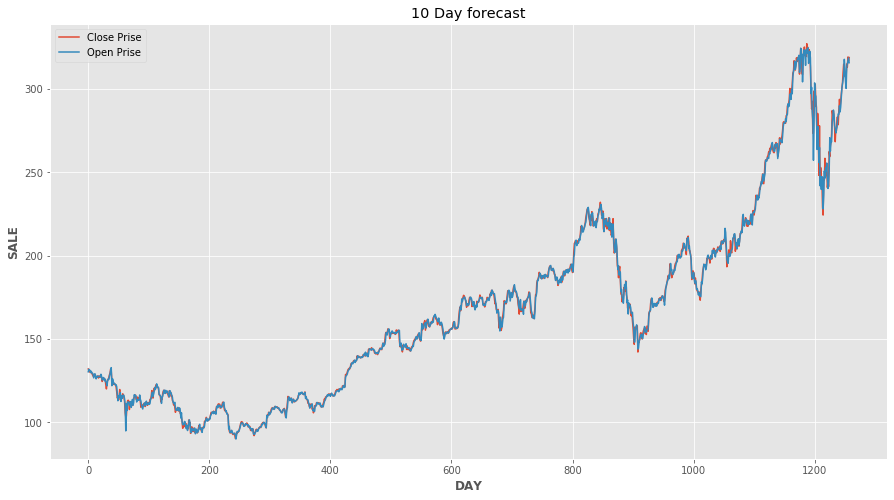

In [36]:
plt.style.use("ggplot")
plt.figure(figsize = [15,8])
plt.plot(df["close"], label="Close Prise")
plt.plot(df["open"], label="Open Prise")
plt.title("10 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("SALE", weight="bold")
plt.legend()
plt.show()

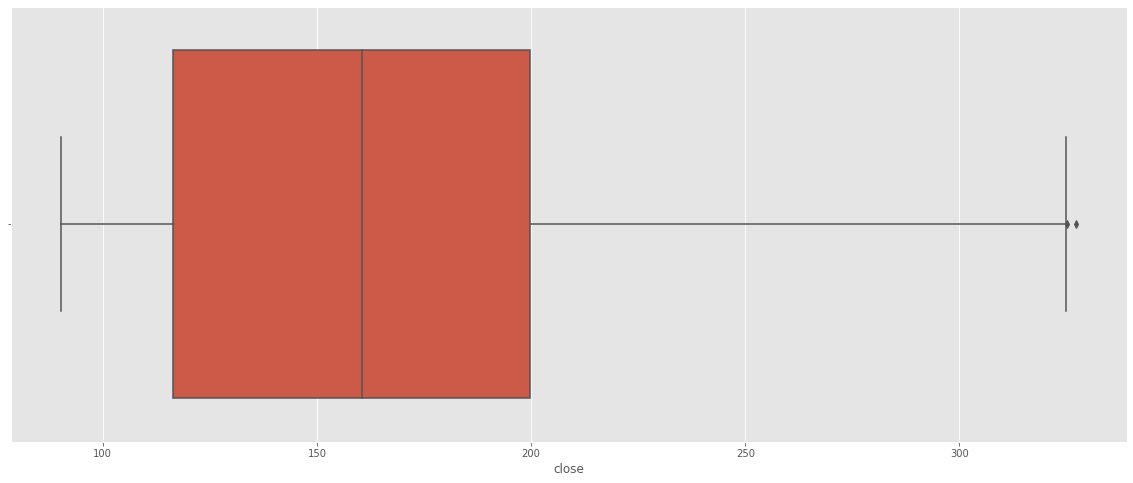

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(df['close'])

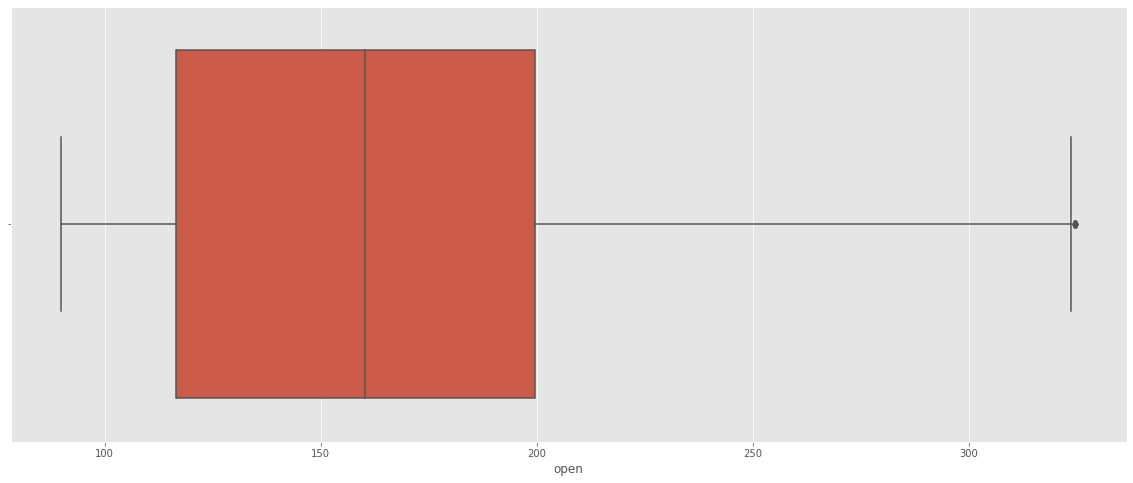

In [46]:
plt.figure(figsize=(20,8))
sns.boxplot(df['open'])

In [50]:
# Data Scaling

In [54]:
Close = df["close"]

In [55]:
Close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [56]:
scaler=MinMaxScaler(feature_range=(0,1))
Close_scaled =scaler.fit_transform(np.array(Close).reshape(-1,1))

In [57]:
Close_scaled

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [58]:
len(Close_scaled)

1258

## splitting dataset into train and test split

In [65]:

training_size=int(len(Close_scaled)*0.80)
test_size=len(Close_scaled)-training_size

train_data = Close_scaled[0:training_size,:]
test_data = Close_scaled[training_size:len(Close_scaled),:1]

In [66]:
print("Training Size: ", training_size)
print("Testing Size: ", test_size)

Training Size:  1006
Testing Size:  252


In [69]:
print("sample from train: ", train_data[:10])
print()
print("sample from test: ", test_data[:10])

sample from train:  [[0.17607447]
 [0.17495567]
 [0.16862282]
 [0.1696994 ]
 [0.16727181]
 [0.16794731]
 [0.16473866]
 [0.16174111]
 [0.1581525 ]
 [0.15654817]]

sample from test:  [[0.37418728]
 [0.37106308]
 [0.36747446]
 [0.37135861]
 [0.35772186]
 [0.35024909]
 [0.37701596]
 [0.38925948]
 [0.40057418]
 [0.42138816]]


In [70]:

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [71]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
print(X_train.shape), print(y_train.shape)

(905, 100)
(905,)


(None, None)

In [73]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [74]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [79]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
EPOCHS = 100
H = model.fit(X_train,
          y_train,
          validation_data=(X_test,ytest),
          epochs=EPOCHS,
          batch_size=64,
          verbose=1)

Train on 905 samples, validate on 151 samples
Epoch 1/100
905/905 [==============================] - 7s 8ms/sample - loss: 0.0190 - val_loss: 0.0951
Epoch 2/100
905/905 [==============================] - 2s 2ms/sample - loss: 0.0033 - val_loss: 0.0275
Epoch 3/100
905/905 [==============================] - 2s 2ms/sample - loss: 0.0014 - val_loss: 0.0101
Epoch 4/100
905/905 [==============================] - 2s 2ms/sample - loss: 0.0010 - val_loss: 0.0107
Epoch 5/100
905/905 [==============================] - 2s 2ms/sample - loss: 9.9646e-04 - val_loss: 0.0117
Epoch 6/100
905/905 [==============================] - 2s 2ms/sample - loss: 9.3404e-04 - val_loss: 0.0099
Epoch 7/100
905/905 [==============================] - 2s 3ms/sample - loss: 8.8230e-04 - val_loss: 0.0107
Epoch 8/100
905/905 [==============================] - 2s 3ms/sample - loss: 8.5067e-04 - val_loss: 0.0088
Epoch 9/100
905/905 [==============================] - 2s 2ms/sample - loss: 8.1577e-04 - val_loss: 0.0092
Epoch 1

905/905 [==============================] - 2s 3ms/sample - loss: 2.4720e-04 - val_loss: 0.0014
Epoch 77/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.3863e-04 - val_loss: 0.0026
Epoch 78/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.2126e-04 - val_loss: 0.0015
Epoch 79/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.2729e-04 - val_loss: 0.0015
Epoch 80/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.4950e-04 - val_loss: 0.0023
Epoch 81/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.1641e-04 - val_loss: 0.0031
Epoch 82/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.3960e-04 - val_loss: 0.0035
Epoch 83/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.1219e-04 - val_loss: 0.0013
Epoch 84/100
905/905 [==============================] - 2s 3ms/sample - loss: 2.6236e-04 - val_loss: 0.0014
Epoch 85/100
905/905 [===================

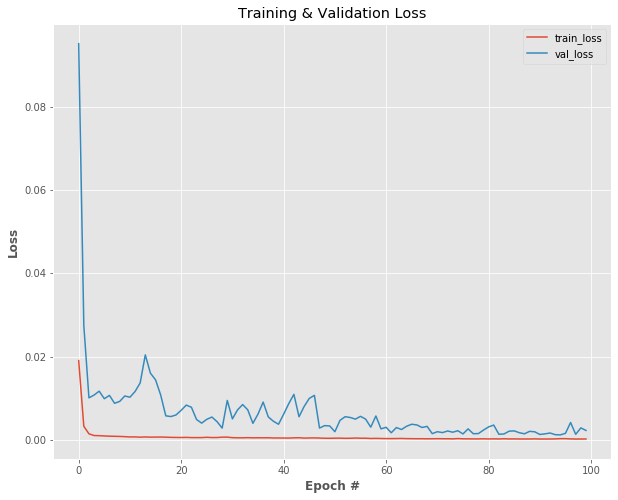

In [82]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [83]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [84]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [86]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

274.24624646805097

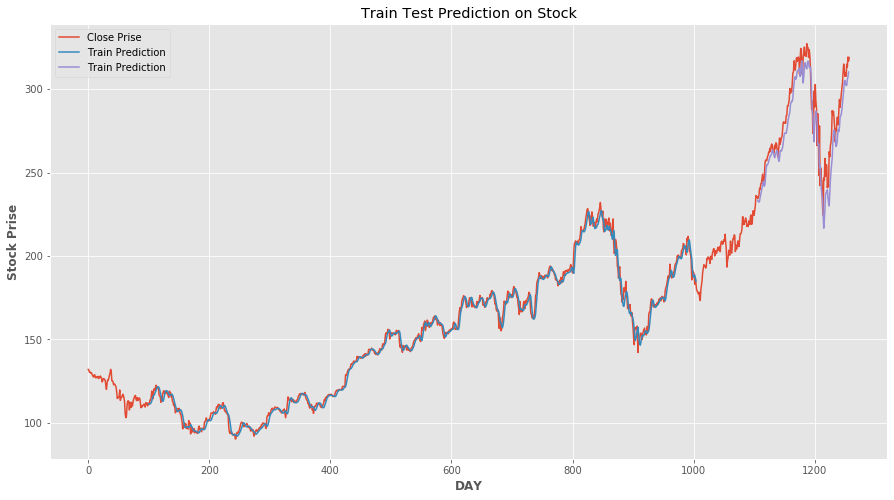

In [144]:
# shift train predictions for plotting
plt.style.use("ggplot")
plt.figure(figsize = [15,8])

# plot actual stock prise
plt.plot(df["close"], label="Close Prise")

# plot predicted train prise 
look_back=100
trainPredictPlot = numpy.empty_like(Close_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(trainPredictPlot, label="Train Prediction")

# plot predicted test prise
testPredictPlot = numpy.empty_like(Close_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(testPredictPlot, label="Train Prediction")

plt.title("Train Test Prediction on Stock")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

### Predicting future stocks 

In [145]:
len(test_data)

252

In [146]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [147]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [148]:
print("temp input sample: ", temp_input[:10])

temp input sample:  [0.8583551465000423, 0.8866418981676942, 0.8743139407244789, 0.8843198513890065, 0.8783669678290975, 0.8986321033521913, 0.925821160179009, 0.9287764924427933, 0.9567677108840666, 0.9386979650426415]


In [149]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("--"*25)
        print("{} - day input : {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output:  {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print()    
print("FINAL 30 DAY OUTPUT")
print(lst_output)

[0.9343976]
101
--------------------------------------------------
1 - day input : [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85

7 - day output:  [[0.8298602]]
--------------------------------------------------
8 - day input : [0.95676771 0.93869797 0.93304061 0.94950604 0.96424048 0.95512117
 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536
 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841
 0.96972895 0.97614625 0.96795575 1.         0.99016297 0.99050072
 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915
 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415

14 - day output:  [[0.68726647]]
--------------------------------------------------
15 - day input : [0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.948323

23 - day output:  [[0.4195858]]
--------------------------------------------------
24 - day input : [0.97572406 0.99159841 0.96972895 0.97614625 0.96795575 1.
 0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.93439758 0.92154884
 0.90506583 0.88996208 0.87563515 0.86

In [150]:
len(df1)

1258

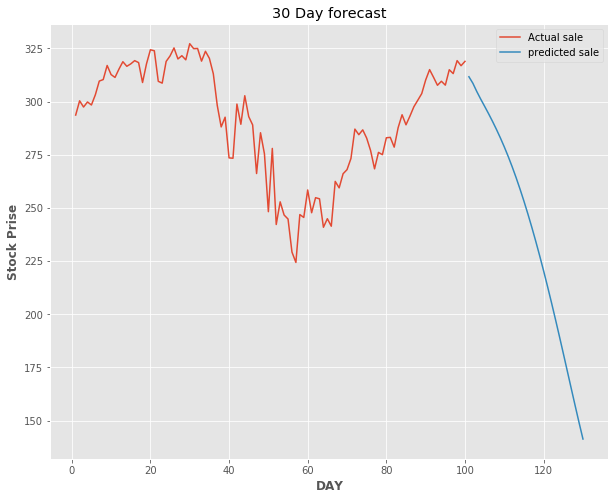

In [152]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)



plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,scaler.inverse_transform(Close_scaled[1158:]) , label="Actual sale")
plt.plot(day_pred,scaler.inverse_transform(lst_output), label="predicted sale")
plt.title("30 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

ValueError: setting an array element with a sequence.

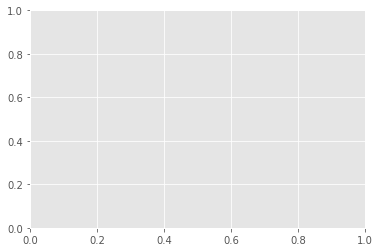

In [153]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])